## LDA/Fisher 源码实现 

### 引入相关库

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#计算均值,要求输入数据为numpy的矩阵格式，行表示样本数，列表示特征    
def meanX(data):
    return np.mean(data, axis=0) #axis=0表示按照列来求均值，如果输入list,则axis=1


### LDA算法实现

In [3]:
#计算类内离散度矩阵子项si
def compute_si(xi):
    n = xi.shape[0]
    print n
    ui = meanX(x1)
    print "ui", ui
    si = 0
    for i in range(0, n):
        si = si + ( xi[i, :] - ui).T * (xi[i, :] - ui )   
    return si

#计算类间离散度矩阵Sb
def compute_Sb(x1, x2):
    dataX=np.vstack((x1,x2))#合并样本   
    print "dataX:", dataX
    #计算均值
    u1=meanX(x1)
    u2=meanX(x2)    
    u=meanX(dataX) #所有样本的均值
    Sb = (u-u1).T * (u-u1) + (u-u2).T * (u-u2)
    return Sb
    
        
def LDA(x1, x2):
    #计算类内离散度矩阵Sw
    s1 = compute_si(x1)
    s2 = compute_si(x2)     
    #Sw=(n1*s1+n2*s2)/(n1+n2)
    Sw = s1 + s2
    
    #计算类间离散度矩阵Sb
    #Sb=(n1*(m-m1).T*(m-m1)+n2*(m-m2).T*(m-m2))/(n1+n2)
    Sb = compute_Sb(x1, x2)
    
    #求最大特征值对应的特征向量    
    eig_value, vec = np.linalg.eig(np.mat(Sw).I*Sb)#特征值和特征向量
    index_vec = np.argsort(-eig_value)#对eig_value从大到小排序，返回索引
    eig_index = index_vec[:1] #取出最大的特征值的索引
    w = vec[:, eig_index] #取出最大的特征值对应的特征向量
    return w

### 构造数据集

In [4]:
def createDataSet():  
    X1 = np.mat(np.random.random((8, 2)) * 5 + 15)  #类别A
    X2 = np.mat(np.random.random((8, 2)) * 5 + 8)   #类别B
    return X1, X2  

x1, x2 = createDataSet()

print x1, x2

[[17.19674786 16.3439288 ]
 [16.20147207 16.09117375]
 [19.51228009 15.37132063]
 [18.37987361 18.42997995]
 [15.76608358 18.04329344]
 [17.15169031 16.04662123]
 [15.80918337 15.50665016]
 [18.74745918 17.43909448]] [[11.00252388 10.89746852]
 [ 9.51184267 12.88408608]
 [ 9.44752805 10.25732681]
 [11.01888012  8.35548904]
 [11.13258089  9.06827655]
 [12.22379099  9.89993748]
 [ 9.7517637  11.56555953]
 [ 8.63321619  9.93448116]]


### LDA训练

In [5]:
w = LDA(x1, x2)
print w

8
ui [[17.34559876 16.6590078 ]]
8
ui [[17.34559876 16.6590078 ]]
dataX: [[17.19674786 16.3439288 ]
 [16.20147207 16.09117375]
 [19.51228009 15.37132063]
 [18.37987361 18.42997995]
 [15.76608358 18.04329344]
 [17.15169031 16.04662123]
 [15.80918337 15.50665016]
 [18.74745918 17.43909448]
 [11.00252388 10.89746852]
 [ 9.51184267 12.88408608]
 [ 9.44752805 10.25732681]
 [11.01888012  8.35548904]
 [11.13258089  9.06827655]
 [12.22379099  9.89993748]
 [ 9.7517637  11.56555953]
 [ 8.63321619  9.93448116]]
[[0.73094071]
 [0.68244097]]


In [6]:
# 编写一个绘图函数
def plotFig(group):  
    fig = plt.figure()  
    plt.ylim(0, 30)  
    plt.xlim(0, 30)  
    ax = fig.add_subplot(111)  
    print group[0,:],group[1,:]
    ax.scatter(group[0,:].tolist(), group[1,:].tolist())  
    plt.show()  

[[17.19674786 16.20147207 19.51228009 18.37987361 15.76608358 17.15169031
  15.80918337 18.74745918 11.00252388  9.51184267  9.44752805 11.01888012
  11.13258089 12.22379099  9.7517637   8.63321619]] [[16.3439288  16.09117375 15.37132063 18.42997995 18.04329344 16.04662123
  15.50665016 17.43909448 10.89746852 12.88408608 10.25732681  8.35548904
   9.06827655  9.89993748 11.56555953  9.93448116]]


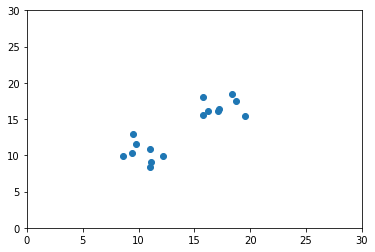

In [9]:
#绘制图形
plotFig(np.hstack((x1.T, x2.T)))  

### 实例测试

In [8]:
test2=np.mat([22,22])  
g=np.dot(w.T, test2.T - 0.5*(meanX(x1)-meanX(x2)))  
print "g(x) :",g  

g(x) : [[26.14379234 26.64141102]]
